In [3]:
import networkx as nx
import numpy as np
import os
import matplotlib.pyplot as plt 
%matplotlib inline 

In [14]:
N = 1000
q= 0.1
phi = 0.18
max_n_avg = 8
num_simulations = 100
increment = 0.2

n_avg = np.arange(1, max_n_avg, increment)
## n_avg = [x for x in range(1,max_n_avg+1,increment)]  # Scale Free
n = len(n_avg)

In [15]:
file_name = "RG_N{}q{}phi{}avg{}sim{}.npy".format(N,int(q*100),int(phi*100),max_n_avg,num_simulations)
file_dir = "./Results"

file_path = os.path.join(file_dir, file_name)
tmp = np.load(file_path)

In [16]:
dims = (num_simulations, n)
names = ["Influential", "Normal"]

S_influential = np.reshape(tmp[:,0], dims)
t_influential = np.reshape(tmp[:,2], dims)
S_normal = np.reshape(tmp[:,1], dims)
t_normal = np.reshape(tmp[:,3], dims)

# Averaged Time of Influenced Nodes
T_influential = np.apply_along_axis(np.mean, 0, t_influential)
T_normal = np.apply_along_axis(np.mean, 0, t_normal)

# Number of Nodes of Network Influenced
N_influential = np.apply_along_axis(np.mean, 0, S_influential)
N_normal = np.apply_along_axis(np.mean, 0, S_normal)

# Proportion of Network Influenced
P_influential = [x/N for x in N_influential]
P_normal = [x/N for x in N_normal]

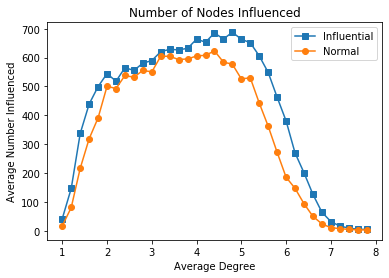

In [17]:
plt.plot(n_avg, N_influential, "-s")
plt.plot(n_avg, N_normal, "-o")
plt.ylabel("Average Number Influenced")
plt.xlabel("Average Degree")
plt.title("Number of Nodes Influenced")
plt.legend(names)

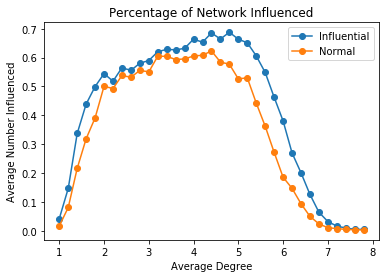

In [18]:
plt.plot(n_avg, P_influential, "-o")
plt.plot(n_avg, P_normal, "-o")
plt.ylabel("Average Number Influenced")
plt.xlabel("Average Degree")
plt.title("Percentage of Network Influenced")
plt.legend(names)

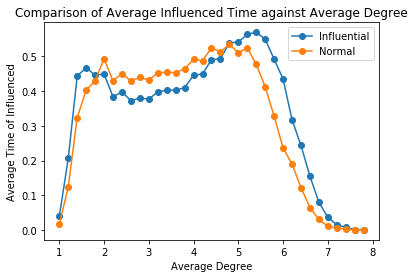

In [19]:
plt.plot(n_avg, T_influential, "-o")
plt.plot(n_avg, T_normal, "-o")
plt.ylabel("Average Time of Influenced")
plt.xlabel("Average Degree")
plt.title("Comparison of Average Influenced Time against Average Degree")
plt.legend(names)